In [45]:
import os

from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from torchvision import transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, transform
import torch
from torchvision.utils import make_grid
from tqdm import tqdm

In [46]:
prefix=os.path.abspath(os.path.dirname(os.getcwd()))+"/"
breed = prefix+"data/breed.csv"
filename = prefix+"data/labels.csv"
labelsNames = ["id", "breed"]
labels = read_csv(filename, names=labelsNames)

breedNames = read_csv(breed)["breed"].tolist()[1:]
print(labels.shape)
# print(len(breedNames))

(12001, 2)


In [47]:
le = LabelEncoder()
le.fit(list(set(labels["breed"].tolist()[1:])))
data_label = le.transform(labels["breed"].tolist()[1:])
print(len(data_label))

12000


In [48]:
data_transforms = {
    "train": transforms.Compose(
        [
            transforms.ToPILImage(),
            transforms.Resize(256),
            transforms.RandomCrop(224),
            transforms.RandomHorizontalFlip(),  # Apply random horizontal flip
            transforms.ToTensor(),
            transforms.Normalize(
                [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]  # Normalize tensor image with mean and std
            ),  # input = (input - mean) / std
        ]
    ),
    "val": transforms.Compose(
        [
            transforms.ToPILImage(),
            transforms.Resize(256),
            transforms.CenterCrop(224),  # For validation, only center crop is needed
            transforms.ToTensor(),
            transforms.Normalize(
                [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]  # Normalize tensor image with mean
            ),  # and std
        ]
    ),
}

In [49]:
from sklearn.model_selection import train_test_split

labels_files = labels["id"].apply(lambda x: prefix+"/data/train/" + x + ".jpg").tolist()[1:]
train_path, val_path, train_label, val_label = train_test_split(
    labels_files, data_label, test_size=0.2
)


In [50]:
from torch.utils.data import Dataset
from skimage import io  # Assuming you are using skimage to read images

class DogDataset(Dataset):
    def __init__(self, data_path, data_label, transform=None):
        """
        - data_path (string): Path to the images
        - data_label (string): Labels for the images
        - transform (callable, optional): A function/transform to apply to each sample
        """
        self.data_path = data_path
        self.data_label = data_label
        self.transform = transform

    def __len__(self):
        return len(self.data_path)

    def __getitem__(self, idx):
        img_path = self.data_path[idx]
        image = io.imread(img_path)
        label = self.data_label[idx]

        # Apply transformations if any
        if self.transform:
            image = self.transform(image)

        return image, label

In [51]:
train_dataset = DogDataset(train_path, train_label, data_transforms["train"])
val_dataset = DogDataset(val_path, val_label, data_transforms["val"])


train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)


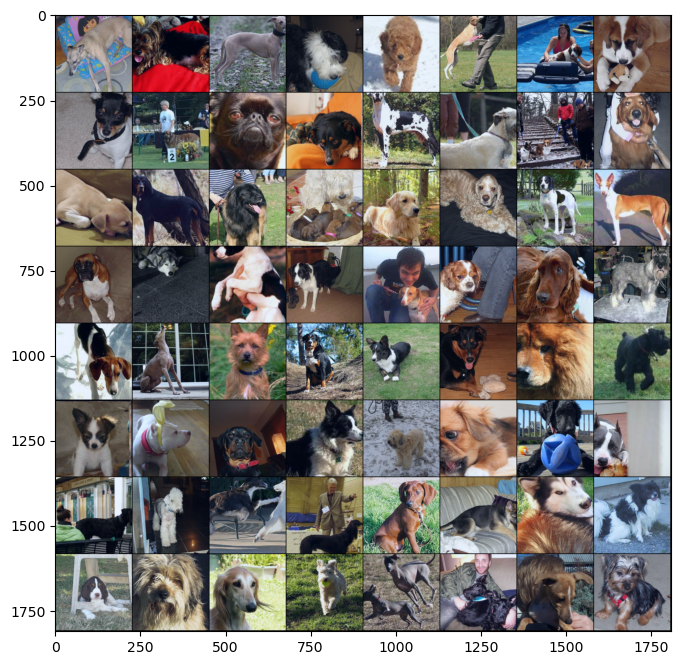

In [52]:

for batch_index, sample_batch in enumerate(train_loader):
    images, labels = sample_batch
    sample_images = make_grid(images, normalize=True)
    plt.figure(figsize=(8, 8))
    plt.imshow(sample_images.permute(1, 2, 0).numpy())
    break

In [53]:
from torchvision import models

resnet152 = models.resnet152(pretrained=True)
resnet152

E:\Program\Anaconda\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
E:\Program\Anaconda\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [54]:
for param in resnet152.parameters():
    param.requires_grad = False
    print(param.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [55]:
# classifier = list(resnet152.classifier.children())  # 读取分类器全部层
# # 将最后一层由 Linear(4096, 1000) 改为 Linear(4096, 120)
# classifier[-1] = torch.nn.Linear(4096, 120)
# classifier.append(torch.nn.Softmax(dim=1))  # 添加 LogSoftmax 层
# resnet152.classifier = torch.nn.Sequential(*classifier)  # 修改原分类器

fc_inputs = resnet152.fc.in_features
resnet152.fc = torch.nn.Sequential(
    torch.nn.Linear(fc_inputs, 2048),
    torch.nn.ReLU(),
    torch.nn.Linear(2048, 120),
    torch.nn.Softmax(dim=1)
)
resnet152

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [56]:
dev = torch.device("cuda") 


In [57]:
criterion = torch.nn.CrossEntropyLoss()  # Cross-entropy loss function
optimizer = torch.optim.Adam(
    lr=0.001, params=resnet152.parameters()
)  # Optimizer
# Learning rate decay: after every 1 iteration, decay learning rate by a factor of 0.9995
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.9995)

criterion, optimizer, lr_scheduler

(CrossEntropyLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     initial_lr: 0.001
     lr: 0.001
     maximize: False
     weight_decay: 0
 ),
 <torch.optim.lr_scheduler.StepLR at 0x232fa157940>)

In [58]:
epochs = 100
model = resnet152.to(dev)
print("Start Training...")
if os.path.exists(prefix+"models/resnet152.pt"):  # Check if a pre-trained model exists
    model_saved = resnet152
    model_saved.load_state_dict(torch.load(prefix+"models/resnet152.pt", weights_only=True))
    model = model_saved.to(dev)
    print("Load model from resnet152.pt")

for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(dev)  # Move images to the device (GPU or CPU)
        labels = labels.to(dev)  # Move labels to the device (GPU or CPU)

        outputs = model(images)
        loss = criterion(outputs, labels.type(torch.int64))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print(
                "Epoch [{}/{}], Batch [{}/{}], Train loss: {:.3f}".format(
                    epoch + 1, epochs, i + 1, len(train_loader), loss.item()
                )
            )

    correct = 0
    total = 0
    if epoch % 10 == 0:
        print("Save model to resnet152.pt")
        torch.save(model.state_dict(), prefix+"models/resnet152.pt")
    
    for images, labels in val_loader:
        images = images.to(dev)  # Move images to the device (GPU or CPU)
        labels = labels.to(dev)  # Move labels to the device (GPU or CPU)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    print("============ Test accuracy: {:.3f} =============".format(correct / total))

    lr_scheduler.step()  # Apply learning rate decay

Start Training...
Load model from resnet152.pt


KeyboardInterrupt: 

In [59]:
torch.save(model.state_dict(), prefix+"models/resnet152.pt")

In [60]:
IMAGE = io.imread("data/train/0AjbbdBwNiGqWo5n.jpg")
IMAGE = data_transforms["val"](IMAGE).unsqueeze(0) 
IMAGE.size()

FileNotFoundError: No such file: 'E:\MyCode\Python_Pycharm\OxfordImageClassification\Pytorch\data\train\0AjbbdBwNiGqWo5n.jpg'

In [61]:
data= model_saved(IMAGE.to(dev))
tempDict = {}
for i in range(len(data[0])):
    tempDict[le.inverse_transform([i])[0]] = data[0][i].item()
temp=pd.DataFrame(tempDict,index=[0])
temp.insert(0,"id","0AjbbdBwNiGqWo5n")
temp

NameError: name 'IMAGE' is not defined

In [62]:
outdata= pd.DataFrame(columns=["id"]+breedNames)
outdata
testPath = os.getcwd()+"/data/test/"
files= os.listdir(testPath)

p=0

for file in tqdm(files):
    p+=1
    IMAGE = io.imread(testPath+file)
    IMAGE = data_transforms["val"](IMAGE).unsqueeze(0)
    data= model_saved(IMAGE.to(dev))
    tempDict = {}
    for i in range(len(data[0])):
        tempDict[le.inverse_transform([i])[0]] = data[0][i].item()
    temp=pd.DataFrame(tempDict,index=[0])
    temp.insert(0,"id",file[:-4])
    outdata=pd.concat([outdata,temp],ignore_index=True)
outdata

FileNotFoundError: [WinError 3] 系统找不到指定的路径。: 'E:\\MyCode\\Python_Pycharm\\OxfordImageClassification\\Pytorch/data/test/'

In [63]:
output_path = "output.csv" 
columns_sorted = ["id"] + sorted(col for col in outdata.columns if col != "id")
outdata = outdata[columns_sorted]
outdata.to_csv(output_path, index=False)  